In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
SPOTIFY_SAMPLE_FP = 'data_music_features/maharshipandya-spotify-tracks-dataset.csv'
# '/Users/sarahnguyen/Downloads/music.csv'

### Import and Basic Cleaning

In [42]:
# source: https://medium.com/@juanfraleonhardt/music-genre-classification-a-machine-learning-exercise-9c83108fd2bb
# Load the data, removing leading and trailing spaces and dropping duplicates
df = pd.read_csv(SPOTIFY_SAMPLE_FP).iloc[:,1:]
df.columns = df.columns.str.strip()
df = df.drop_duplicates()

# Drop rows where genres are based on language and not audio features
language_genres = ['british','french','german','swedish','spanish','indian','malay','turkish']#,'world-music']
# world music kept based on knowledge graph
df = df.drop(df[df['track_genre'].isin(language_genres)].index)

# remove more genres based on knowledge graph identified inconsistent connections
kg_removed_cols = ['sleep', 'comedy', 'happy', 'sad', 'german', 'acoustic', 'turkish', 'iranian', 'malay', 'spanish', 'songwriter', 'british', 'french', 'swedish', 'indian', 'india']
df = df.drop(df[df['track_genre'].isin(kg_removed_cols)].index)

# Convert booleans to integers
df['explicit'] = df['explicit'].astype(int)

df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1000,4pR4oQJULf7FDB54TleMyH,Limoblaze;Lecrae;Happi,Jireh (My Provider),Jireh (My Provider),64,168000,0,0.443,0.778,0,-7.564,0,0.2660,0.241,0.000000,0.2150,0.6280,128.250,5,afrobeat
1001,4Ds4bq6aqOSAp1T7DikOi4,Criolo,Ainda Há Tempo,Ainda Há Tempo,44,318360,0,0.580,0.800,6,-7.528,1,0.3450,0.281,0.000000,0.0708,0.4830,81.303,4,afrobeat
1002,7nYbKsvhM88mHCmFsAIQVp,Criolo,Fellini,Fellini,42,171989,0,0.805,0.746,1,-5.211,0,0.1850,0.238,0.000000,0.2150,0.7170,127.922,4,afrobeat
1003,7gVNP7rI9UBZndge0ulKfL,Criolo,Nó na Orelha,Lion Man,46,205440,0,0.582,0.660,7,-4.988,0,0.0544,0.399,0.000000,0.1270,0.4840,83.789,4,afrobeat
1004,1hLvWelTny8vttEEZIXVjw,Criolo,Espiral de Ilusão,Espiral de Ilusão,44,220800,0,0.776,0.314,2,-9.513,1,0.0340,0.881,0.000723,0.1390,0.4760,124.055,4,afrobeat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.235,5,-16.393,1,0.0422,0.640,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.117,0,-18.318,0,0.0401,0.994,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.329,0,-10.895,0,0.0420,0.867,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0,0.587,0.506,7,-10.889,1,0.0297,0.381,0.000000,0.2700,0.4130,135.960,4,world-music


In [43]:
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
# Scale numeric audio features
numeric_features = ['popularity','duration_ms','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
scaler = MinMaxScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])

### Associations

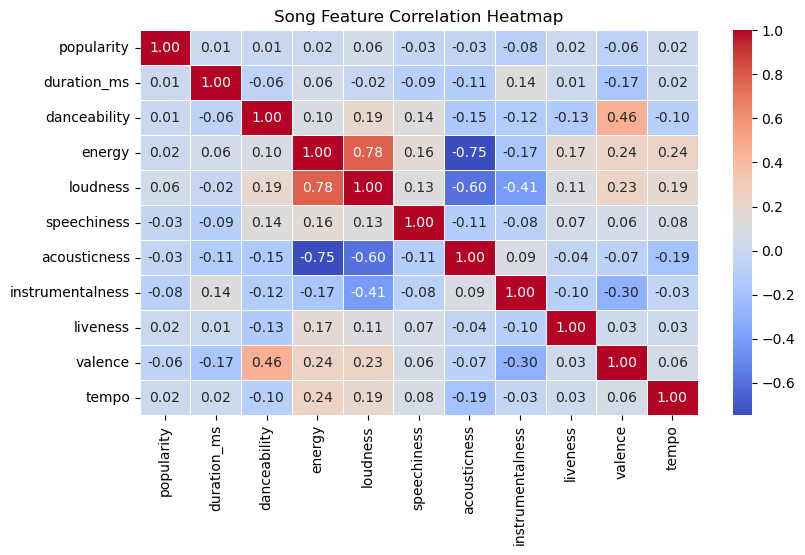

In [46]:
# source: https://medium.com/@juanfraleonhardt/music-genre-classification-a-machine-learning-exercise-9c83108fd2bb

# Visualization
plt.figure(figsize=(9, 5))
plt.title("Song Feature Correlation Heatmap")
#sns.set(font_scale=0.8)
corr = df[numeric_features].corr()
sns.heatmap(corr, annot=True, linewidths=.5, cmap='coolwarm', fmt=".2f")
plt.show()


Takeaways:
- Songs that are louder have more energy
- Songs that are happier (valence) are more dancable
- Songs that are more acoustic have less energy and are less loud
- Songs that are more instrumental are also less loud

### Encoding for Clustering

Can use one-hot but will create sparsity and 100+ columns. Would retain genre signal b/c there is no inherent order to genre.
Label encoding will remove the sparsity problem and make clustering easier. Could inject some weird ordinal behavior into genre, but I think we have to do it. Can compare with OHE later.

In [47]:
# [TODO] Compare OHE implementaion

In [48]:
# example did this incorrectly. keys and time signature do have ordering and are already encoded
# don't need to be one hot
#df = pd.get_dummies(df, columns=['key'], prefix = 'key', drop_first=True)
#df = pd.get_dummies(df, columns=['time_signature'], prefix = 'meter', drop_first=True)

In [49]:
df['key'].value_counts()

key
7     11486
0     11324
2     10031
9      9735
1      9236
5      8178
11     8131
4      7765
6      6805
8      6443
10     6412
3      3062
Name: count, dtype: int64

In [50]:
df['time_signature'].value_counts()

time_signature
4    89201
3     7277
5     1389
1      721
0       20
Name: count, dtype: int64

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
len(df['track_genre'].unique())

99

In [53]:
df.drop("track_genre", axis=1)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1000,4pR4oQJULf7FDB54TleMyH,Limoblaze;Lecrae;Happi,Jireh (My Provider),Jireh (My Provider),0.64,0.032078,0,0.449746,0.777996,0,0.750541,0,0.277952,0.241968,0.000000,0.207671,0.631156,0.526971,5
1001,4Ds4bq6aqOSAp1T7DikOi4,Criolo,Ainda Há Tempo,Ainda Há Tempo,0.44,0.060787,0,0.588832,0.799996,6,0.751284,1,0.360502,0.282129,0.000000,0.062125,0.485427,0.334069,4
1002,7nYbKsvhM88mHCmFsAIQVp,Criolo,Fellini,Fellini,0.42,0.032839,0,0.817259,0.745995,1,0.799068,0,0.193312,0.238956,0.000000,0.207671,0.720603,0.525623,4
1003,7gVNP7rI9UBZndge0ulKfL,Criolo,Nó na Orelha,Lion Man,0.46,0.039226,0,0.590863,0.659993,7,0.803667,0,0.056844,0.400602,0.000000,0.118849,0.486432,0.344284,4
1004,1hLvWelTny8vttEEZIXVjw,Criolo,Espiral de Ilusão,Espiral de Ilusão,0.44,0.042159,0,0.787817,0.313986,2,0.710347,1,0.035528,0.884538,0.000723,0.130961,0.478392,0.509734,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,0.21,0.073511,0,0.174619,0.234985,5,0.568459,1,0.044096,0.642570,0.928000,0.077769,0.034070,0.517705,5
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,0.22,0.073511,0,0.176650,0.116982,0,0.528759,0,0.041902,0.997992,0.976000,0.096644,0.035176,0.350242,4
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,0.22,0.051833,0,0.638579,0.328986,0,0.681845,0,0.043887,0.870482,0.000000,0.075347,0.746734,0.543933,4
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,0.41,0.054206,0,0.595939,0.505990,7,0.681969,1,0.031034,0.382530,0.000000,0.263184,0.415075,0.558651,4


In [54]:
# label encode genre

# Perform Label Encoding
label_encoder = LabelEncoder()
encoded_genre = label_encoder.fit_transform(df["track_genre"].values)
encoded_genre

array([ 0,  0,  0, ..., 98, 98, 98])

In [55]:
df['encoded_genre'] = encoded_genre

### Data Minimization & Export

In [56]:
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'encoded_genre'],
      dtype='object')

#### On Time Signature from ChatGPT:

Prompt: "I'm clustering music tracks based off of music features. Should I use time signature as a clustering feature?

**time_signature**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4."

Response: 
"It depends on what aspect of the music you're trying to capture with clustering. Here are some considerations:  

When to Include **Time Signature**  
✅ If your goal is to group tracks by rhythmic structure or feel, then **yes**, time signature is relevant. Songs with a **3/4** (waltz) feel are rhythmically distinct from **4/4** (common time) or **7/4** (odd meter). If your clustering is focused on genres or rhythmic patterns, this could be useful.  

When to Exclude **Time Signature**  
❌ If your clustering is more focused on **timbre, mood, or melody** (e.g., clustering songs based on energy, danceability, or instrumentation), time signature might not contribute much since many genres predominantly use **4/4** time. In this case, including it may add noise rather than meaningful separation.  

Alternative Approach  
🔹 **Test it both ways**: Run clustering with and without **time_signature** and evaluate if it improves separation or introduces unnecessary fragmentation.  
🔹 **Combine with other rhythmic features**: If using time signature, it may be helpful alongside **tempo** and **beat strength** for a fuller rhythmic profile.  

Would you like suggestions on which clustering algorithms to use for this?"

In [57]:
# [TODO] df.drop("track_genre", axis=1)
# drop og before training

In [59]:
df.to_csv('data_music_features/25-03-12_processed_spotify_sample.csv')